## SECOM data project - correlations
## Author - Shanshan Lin

For this project, we will use the SECOM manufacturing Data Set from the UCI Machine Learning Repository. The set is originally for semiconductor manufacturing, but in our case, we will assume that it is for the diaper manufacturing process.

The dataset consists of two files:

a dataset file SECOM containing 1567 examples, each with 591 features, presented in a 1567 x 591 matrix
a labels file listing the classifications and date time stamp for each example
Reference
Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In the secom data, each of the attributes represent different sensors readings across the manufacturing process. I am interested in seeing whether or not each sensor has a strong correlation to the classifier being 1 or 0 - in other words, if monitoring the sensors help with detecting defective product in an early phase.

1. Read, merge, and prepare data. First, read in the secom_labels dataset which contains the classifier and timestamps for the actual dataframe:

In [61]:
import pandas as pd
file1 = open('secom_labels.data')
lines = file1.readlines()
file1.close()

# code reference: DATASCI420 Lesson 4 Code Talk - Importing the Dataset
#cols = []
#for line in lines:
    #if "@attribute" in line:
        #tstr=line.split()
        #cols.append(tstr[1])
classifier = pd.DataFrame(lines, columns = {'temp'})
classifier = pd.DataFrame(classifier['temp'].str.split('"',1).tolist(),
                                 columns = ['classifier','timestamp'])
classifier['timestamp'] = classifier['timestamp'].str.replace('"\n', '')
classifier

,classifier,timestamp
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00
...,...,...
1562,-1,16/10/2008 15:13:00
1563,-1,16/10/2008 20:49:00
1564,-1,17/10/2008 05:26:00
1565,-1,17/10/2008 06:01:00


Reading in the actual data frame, and 3. prepare the data by imputing the missing value:

In [62]:
from sklearn.impute import KNNImputer
df = pd.read_csv('secom.data', sep = ' ', header = None, na_values='?')
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df = pd.DataFrame(imputer.fit_transform(df))
df

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.01620,...,0.00650,97.34530,0.5005,0.0118,0.0035,2.3630,0.0148,0.0119,0.0037,75.0808
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.00050,...,0.00600,208.20450,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.00410,...,0.01480,82.86020,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.01240,...,0.00440,73.84320,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.00310,...,0.00435,207.40450,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.00450,...,0.00470,203.17200,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.00610,...,0.00465,43.60775,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4765,-0.01355,...,0.00250,43.52310,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.00720,...,0.00750,93.49410,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


Set the column names for data:

In [63]:
cols = pd.DataFrame(list(df.columns), columns = {'id'})
cols['name'] = 'sensor'
cols['id'] = cols['id'].astype(str)
cols['col_names'] = cols['name'] + '_' + cols['id']
cols = list(cols['col_names'])
df.columns = cols
df

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_580,sensor_581,sensor_582,sensor_583,sensor_584,sensor_585,sensor_586,sensor_587,sensor_588,sensor_589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.01620,...,0.00650,97.34530,0.5005,0.0118,0.0035,2.3630,0.0148,0.0119,0.0037,75.0808
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.00050,...,0.00600,208.20450,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.00410,...,0.01480,82.86020,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.01240,...,0.00440,73.84320,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.00310,...,0.00435,207.40450,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.00450,...,0.00470,203.17200,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.00610,...,0.00465,43.60775,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4765,-0.01355,...,0.00250,43.52310,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.00720,...,0.00750,93.49410,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


Merge the classifier and timestamps with the actual data:

In [64]:
df['classifier'] = classifier['classifier'].astype(float)
df['timestamp'] = classifier['timestamp']
df

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_582,sensor_583,sensor_584,sensor_585,sensor_586,sensor_587,sensor_588,sensor_589,classifier,timestamp
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.01620,...,0.5005,0.0118,0.0035,2.3630,0.0148,0.0119,0.0037,75.0808,-1.0,19/07/2008 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.00050,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1.0,19/07/2008 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.00410,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1.0,19/07/2008 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.01240,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1.0,19/07/2008 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.00310,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1.0,19/07/2008 15:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.00450,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1.0,16/10/2008 15:13:00
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.00610,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1.0,16/10/2008 20:49:00
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4765,-0.01355,...,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1.0,17/10/2008 05:26:00
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.00720,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1.0,17/10/2008 06:01:00


Visually explore data. Due to the nature of this dataset having 590 columns, picking out 5 columns as sample to examine its trend:

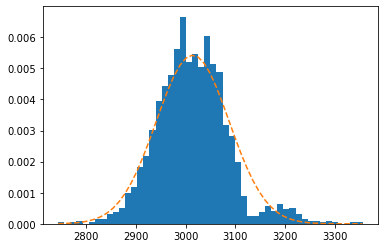

In [76]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
num_bins = 50
sigma = np.std(df['sensor_0'])
mu = np.mean(df['sensor_0'])
n, bins, patches = ax.hist(df['sensor_0'], num_bins, density=True)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

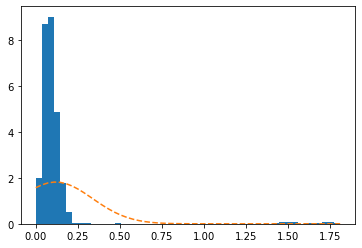

In [78]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
num_bins = 50
sigma = np.std(df['sensor_300'])
mu = np.mean(df['sensor_300'])
n, bins, patches = ax.hist(df['sensor_300'], num_bins, density=True)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

c:\users\shanshan lin\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
c:\users\shanshan lin\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
c:\users\shanshan lin\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


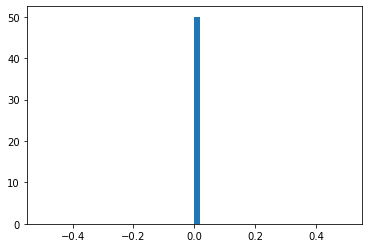

In [79]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
num_bins = 50
sigma = np.std(df['sensor_400'])
mu = np.mean(df['sensor_400'])
n, bins, patches = ax.hist(df['sensor_400'], num_bins, density=True)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

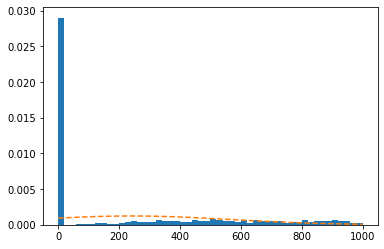

In [80]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
num_bins = 50
sigma = np.std(df['sensor_500'])
mu = np.mean(df['sensor_500'])
n, bins, patches = ax.hist(df['sensor_500'], num_bins, density=True)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

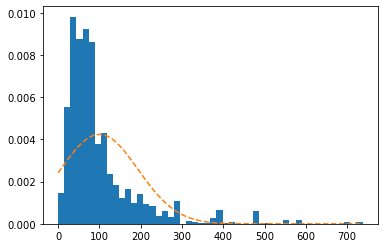

In [82]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
num_bins = 50
sigma = np.std(df['sensor_589'])
mu = np.mean(df['sensor_589'])
n, bins, patches = ax.hist(df['sensor_589'], num_bins, density=True)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')

5. Handling class imbalance problems. Applying train, test and split function on the dataset and using SMOTE to handle the imbalance issue:

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
# keep only the numeric variables for training purposes
non_num_cols = ['timestamp']
test_df = df.drop(non_num_cols, axis = 1)
# set the target variable
target = df['classifier']
# run the train test split function
x_train, x_test, y_train, y_test = train_test_split(test_df, target, test_size=0.6, random_state=0)
# initiate the model
LR = LogisticRegression(max_iter = 100000)
LR.fit(x_train, y_train)

# predictions first
predictions = LR.predict_proba(x_test)
# matrix
predictions = predictions[:, 1]
predictions

auc = roc_auc_score(y_test, predictions)
auc

c:\users\shanshan lin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6869411326378538

Applying SMOTE to the model, then calculate the AUC score again:

In [66]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)
# set the target variable
target = x_res['classifier']
x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(x_res, target, test_size=0.6, random_state=0)

# initiate the model
LR = LogisticRegression(max_iter = 1000000)
LR.fit(x_train_res, y_train_res)

# predictions first
predictions = LR.predict_proba(x_test_res)
# matrix
predictions = predictions[:, 1]

auc = roc_auc_score(y_test_res, predictions)
auc


c:\users\shanshan lin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9144345298838281

Applying feature selection techniques. First, filter selection.

Using the correlation calculated from above as reference:

In [70]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
corr = pd.DataFrame(df.corr()["classifier"])
temp = corr.sort_values(by=['classifier'], ascending = False)
selected_names_filter = list(temp[1:21].index)
df_filtered = df[selected_names_filter]
df_filtered


,sensor_59,sensor_103,sensor_510,sensor_348,sensor_431,sensor_434,sensor_430,sensor_435,sensor_436,sensor_21,sensor_129,sensor_210,sensor_298,sensor_163,sensor_124,sensor_295,sensor_160,sensor_164,sensor_299,sensor_121
0,-1.7264,-0.0042,64.6707,0.02150,33.1562,10.0503,18.7673,2.7073,3.1158,-5419.00,-0.04730,0.07720,0.0373,0.090,15.93,398.3185,967.0,0.048,0.0202,15.880
1,0.8073,-0.0045,141.4365,0.01420,2.2655,8.6336,10.4383,5.7093,1.6779,-5441.50,-0.09460,0.05660,0.0502,0.112,15.88,26.5879,59.0,0.115,0.0561,15.880
2,23.8245,-0.0026,240.7767,0.01050,29.1663,14.2503,10.3162,5.7650,0.8972,-5447.75,-0.18920,0.03390,0.0800,0.187,15.95,329.6406,788.0,0.117,0.0583,15.900
3,24.3791,-0.0059,113.5593,0.04070,13.4051,5.1760,15.7089,5.3899,1.3671,-5468.25,0.28380,0.12480,0.0285,0.068,15.59,157.0889,355.0,0.108,0.0445,15.550
4,-12.2945,-0.0045,148.0663,0.02460,10.7390,11.4064,12.7642,2.0088,1.5533,-5476.25,-0.56770,0.09150,0.0755,0.147,15.71,128.0296,283.0,0.040,0.0181,15.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2.8182,-0.0094,53.1915,0.02235,12.8067,9.5963,23.6217,8.1372,3.6727,-5418.75,0.00000,0.08020,0.0520,0.123,15.67,149.1755,334.0,0.159,0.0760,15.690
1563,-3.3555,-0.0116,29.4372,0.02605,4.1273,5.0598,7.8642,2.3859,5.2024,-6408.75,-0.14190,0.09385,0.0249,0.055,15.87,43.8368,94.0,0.043,0.0192,15.920
1564,1.1664,-0.0142,54.8330,0.02700,20.0222,8.4300,22.8594,3.8076,3.7752,-5153.25,0.02365,0.09390,0.0452,0.109,15.74,236.9079,542.0,0.074,0.0320,15.720
1565,4.4682,-0.0087,78.4993,0.02085,9.4153,7.6117,33.0061,9.7082,3.4127,-5271.75,-0.99340,0.07595,0.0444,0.098,15.72,129.7832,252.0,0.193,0.0812,15.720


Next, Wrapper Method. Using the backward step-wise method because here the number of variables is smaller than the sample size.

In [71]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LinearRegression
# set the feature model
X = df.drop(['timestamp'], axis=1)
names = list(X.columns)
y = df['classifier']
estimator = LinearRegression()
selector = RFE(estimator, 20, step=1) # select 10 features, just like above
selector = selector.fit(X, y)
ref = list(selector.support_)
temp = pd.DataFrame({'names':names, 'reference':ref}) # create a reference dataframe
selected_names_backward = list(temp[temp['reference'] == True].names)
df_backward_selected = df[selected_names_backward]
df_backward_selected

c:\users\shanshan lin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


,sensor_34,sensor_36,sensor_43,sensor_45,sensor_48,sensor_50,sensor_94,sensor_95,sensor_100,sensor_114,sensor_172,sensor_174,sensor_249,sensor_278,sensor_307,sensor_309,sensor_376,sensor_377,sensor_387,classifier
0,50.6170,49.3830,352.7173,130.3691,141.2282,624.3145,0.0001,0.0003,0.0002,0.0,0.3183,0.3184,0.0,0.0010,0.1342,0.1343,0.0010,0.0013,0.0,-1.0
1,50.6596,49.3404,352.2445,133.1727,145.8445,631.2618,-0.0005,0.0001,-0.0004,0.0,0.4115,0.4115,0.0,0.0012,0.1667,0.1667,0.0022,0.0013,0.0,-1.0
2,50.1530,49.8470,364.3782,131.8027,141.0845,637.2655,0.0000,0.0002,0.0006,0.0,0.3141,0.3141,0.0,0.0012,0.1288,0.1288,0.0021,0.0015,0.0,1.0
3,50.5100,49.4900,363.0273,131.8027,142.5427,637.3727,-0.0001,0.0002,-0.0002,0.0,0.2618,0.2618,0.0,0.0007,0.1004,0.1004,0.0024,0.0014,0.0,-1.0
4,50.2480,49.7520,353.3400,176.3136,138.0882,667.7418,-0.0001,-0.0001,0.0004,0.0,0.3053,0.3053,0.0,0.0013,0.1354,0.1354,0.0025,0.0012,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,50.2482,49.7518,369.9009,128.6527,138.0482,636.6018,0.0000,0.0000,0.0000,0.0,0.3017,0.3017,0.0,0.0005,0.1205,0.1205,0.0016,0.0012,0.0,-1.0
1563,50.2067,49.7934,351.4055,151.0709,132.9045,635.3809,0.0000,0.0001,-0.0004,0.0,0.4711,0.4711,0.0,0.0010,0.1870,0.1870,0.0013,0.0012,0.0,-1.0
1564,50.9333,49.0667,350.3145,134.8609,142.8818,628.0573,-0.0002,0.0000,-0.0001,0.0,0.3852,0.3852,0.0,0.0013,0.1473,0.1473,0.0025,0.0024,0.0,-1.0
1565,50.6547,49.3453,370.5845,127.4127,141.9164,639.9136,0.0000,0.0001,0.0004,0.0,0.2877,0.2877,0.0,0.0011,0.1297,0.1296,0.0021,0.0028,0.0,-1.0


Last, Embedded Method. Using the LASSO method with alpha = 3 so that the model selects 20 variables:

In [73]:
# LASSO
from sklearn import linear_model
alpha = 3
clf = linear_model.Lasso(alpha=alpha)
clf.fit(X, y)
coef = list(clf.coef_)
names = list(X.columns)
temp = pd.DataFrame({'names':names, 'coef':coef})
df_lasso = temp[temp['coef'] != 0]
selected_names_lasso = df_lasso['names']
df_lasso_selected = df[selected_names_lasso]
df_lasso_selected

,sensor_3,sensor_21,sensor_24,sensor_67,sensor_90,sensor_140,sensor_159,sensor_160,sensor_161,sensor_162,sensor_204,sensor_297,sensor_418,sensor_468,sensor_484,sensor_485,sensor_486,sensor_488,sensor_499,sensor_511
0,1411.1265,-5419.00,751.00,0.9226,8671.93010,0.3948,1017.0,967.0,1066.0,368.0,0.2951,158.3330,525.09650,311.6377,494.69960,178.17590,843.11380,53.10980,0.0000,0.0000
1,1463.6606,-5441.50,-1640.25,1.1598,8407.02990,0.2301,568.0,59.0,297.0,3277.0,0.3580,1529.7622,0.00000,463.2883,0.00000,359.04440,130.63500,194.43710,0.0000,0.0000
2,1698.0172,-5447.75,-1916.50,0.8694,9317.16980,0.3263,562.0,788.0,759.0,2100.0,0.1164,902.4576,0.00000,21.3645,0.00000,190.38690,746.91500,191.75820,0.0000,244.2748
3,909.7926,-5468.25,-1657.25,0.9761,8205.70000,0.1915,859.0,355.0,3433.0,3004.0,0.3458,1377.4276,317.73620,24.2831,305.75000,88.55530,104.66600,0.00000,0.0000,0.0000
4,1326.5200,-5476.25,117.00,0.9256,9014.46000,0.3744,699.0,283.0,1747.0,1443.0,0.3951,628.3083,0.00000,44.8980,461.86190,240.17810,0.00000,748.17810,293.1396,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,3085.3781,-5418.75,356.00,0.9923,9201.72010,0.3124,1280.0,334.0,7112.0,565.0,0.1204,263.4654,708.66570,272.1613,42.70960,143.25340,273.68870,254.28570,0.0000,235.7895
1563,1124.6595,-6408.75,339.00,0.4904,8624.85990,0.1119,504.0,94.0,315.0,367.0,0.1408,191.4071,764.08160,139.1762,126.27580,31.09455,0.00000,187.58595,816.3636,700.0000
1564,1110.4967,-5153.25,-1226.00,0.9078,8992.67020,0.1071,1178.0,542.0,3662.0,1355.0,0.0626,554.7786,148.10550,698.7529,51.09930,58.45110,196.13195,221.48290,456.7164,0.0000
1565,1183.7287,-5271.75,394.75,0.9981,8407.20995,0.1737,1740.0,252.0,2702.0,1093.0,0.0952,461.6935,470.75060,163.8250,506.86055,116.82950,196.13195,0.00000,511.3402,456.4103


In [74]:
s1 = set(selected_names_filter).intersection(set(selected_names_backward)) # intersection of filter selection and wrapper
print('The filter selection and the backward selection both chose:', s1)
s2 = set(selected_names_lasso).intersection(set(selected_names_backward)) 
print('The LASSO selection and the backward selection both chose:', s2)
s3 = set(selected_names_lasso).intersection(set(selected_names_filter))
print('The filter selection and the LASSO selection both chose:', s3)
intersecs = s1.intersection(set(selected_names_lasso))
print('All of the selection methods chose:', intersecs)


The filter selection and the backward selection both chose: set()
The LASSO selection and the backward selection both chose: set()
The filter selection and the LASSO selection both chose: {'sensor_21', 'sensor_160'}
All of the selection methods chose: set()


Summary of findings:

    1. After applying the SMOTE function, the model performance noticably increased - the AUC score significantly increased from 0.6 to 0.9.
    2. Upon examining the sample plots, we can see that the individual columns are fairly skewed. If such skewness is showing in a sample of 5 columns, it's fair to assume that the data would perform better if it was normalized.
    3. The three selection methods did not choose many common columns, indicating that not many columns have strong correlations to the target column